# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(Input_shape, Output_shape =10, num_nuerons=[512,256,128,64,32]):
    input_layer = keras.layers.Input(Input_shape)
    
    for i, n_units in enumerate(num_nuerons): 
      if i==0:
        x= keras.layers.Dense(units = n_units, activation ='relu', name='hiden_layer'+str(i+1))(input_layer)
      else:
        x= keras.layers.Dense(units = n_units, activation ='relu', name='hiden_layer'+str(i+1))(x)
    out = keras.layers.Dense (units = Output_shape, activation ='softmax', name ='out')(x)
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
      
    return model

In [0]:
## 超參數設定
LearningRate = [0.1,0.01,0.001,0.0001]
epoch =50
BATCHSIZE =256
Momentum =0.9


In [27]:
results = {}
for lr in LearningRate : 
  keras.backend.clear_session()
  print("SGD Experiment with LR = %.6f" % (lr))
  model = build_mlp(Input_shape=x_train.shape[1:])
  model.summary()
  SGD = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=Momentum)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=SGD)

  model.fit(x_train, y_train, 
              epochs=epoch, 
              batch_size=BATCHSIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  exp_name_tag = "exp-lr-%s" % str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

"""
建立你的訓練與實驗迴圈並蒐集資料
"""

SGD Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiden_layer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hiden_layer3 (Dense)         (None, 128)               32896     
_________________________________________________________________
hiden_layer4 (Dense)         (None, 64)                8256      
_________________________________________________________________
hiden_layer5 (Dense)         (None, 32)                2080      
_________________________________________________________________
out (Dense)                  (None, 10)   

W0808 02:19:06.067215 140677896468352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0803 - acc: 0.2147 - val_loss: 1.9486 - val_acc: 0.2637
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8410 - acc: 0.3251 - val_loss: 1.7514 - val_acc: 0.3655
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7356 - acc: 0.3719 - val_loss: 1.7625 - val_acc: 0.3741
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6816 - acc: 0.3963 - val_loss: 1.6339 - val_acc: 0.4080
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6223 - acc: 0.4203 - val_loss: 1.6874 - val_acc: 0.4036
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5760 - acc: 0.4378 - val_loss: 1.7463 - val_acc: 0.3822
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5388 - acc: 0.4518 - val_loss: 1.6095 - val_ac

'\n建立你的訓練與實驗迴圈並蒐集資料\n'

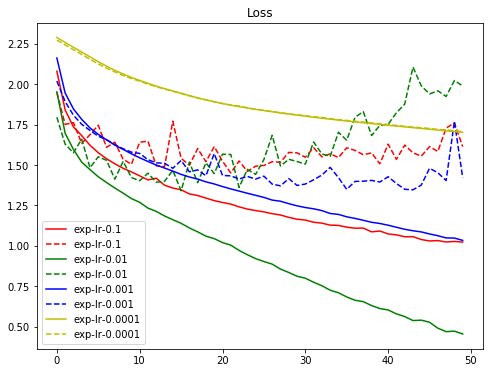

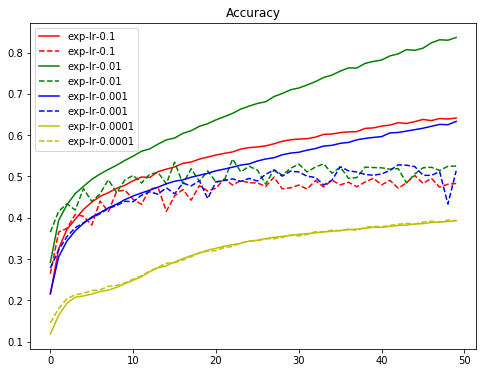

In [28]:
"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [31]:
results2 = {}
for lr in LearningRate : 
  keras.backend.clear_session()
  print("RMSprop Experiment with LR = %.6f" % (lr))
  model = build_mlp(Input_shape=x_train.shape[1:])
  model.summary()
  RMSprop = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=RMSprop)

  model.fit(x_train, y_train, 
              epochs=epoch, 
              batch_size=BATCHSIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  exp_name_tag = "exp-lr-%s" % str(lr)
  results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


RMSprop Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiden_layer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hiden_layer3 (Dense)         (None, 128)               32896     
_________________________________________________________________
hiden_layer4 (Dense)         (None, 64)                8256      
_________________________________________________________________
hiden_layer5 (Dense)         (None, 32)                2080      
_________________________________________________________________
out (Dense)                  (None, 10

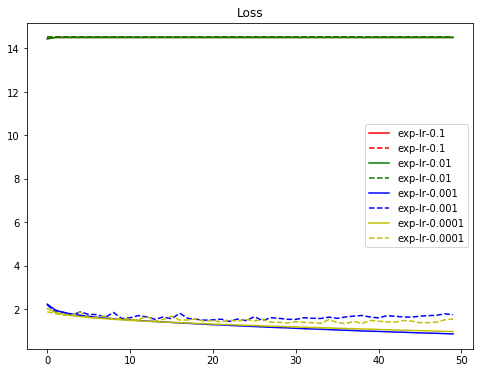

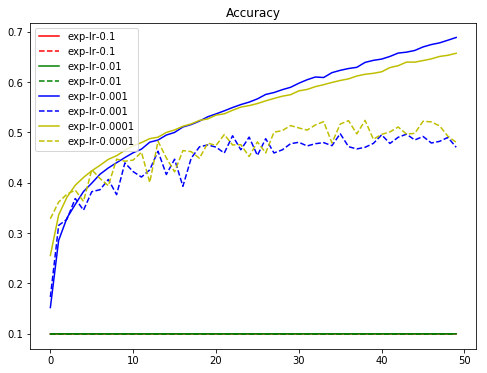

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [39]:
results3 = {}
for lr in LearningRate : 
  keras.backend.clear_session()
  print("Adagrad Experiment with LR = %.6f" % (lr))
  model = build_mlp(Input_shape=x_train.shape[1:])
  model.summary()
  Adagrad = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=Adagrad)

  model.fit(x_train, y_train, 
              epochs=epoch, 
              batch_size=BATCHSIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  exp_name_tag = "exp-lr-%s" % str(lr)
  results3[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Adagrad Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiden_layer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hiden_layer3 (Dense)         (None, 128)               32896     
_________________________________________________________________
hiden_layer4 (Dense)         (None, 64)                8256      
_________________________________________________________________
hiden_layer5 (Dense)         (None, 32)                2080      
_________________________________________________________________
out (Dense)                  (None, 10

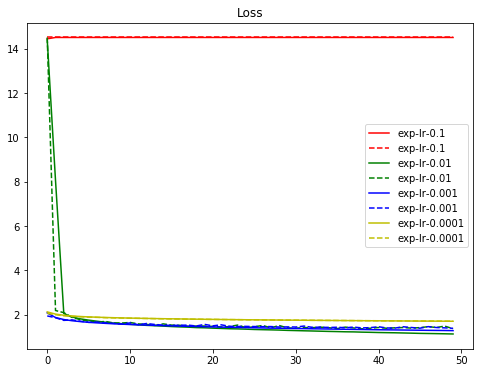

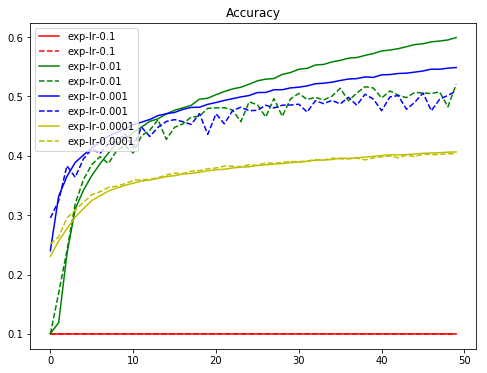

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-loss'])),results3[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results3[cond]['valid-loss'])),results3[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-acc'])),results3[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results3[cond]['valid-acc'])),results3[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [41]:
results4 = {}
for lr in LearningRate : 
  keras.backend.clear_session()
  print("Adam Experiment with LR = %.6f" % (lr))
  model = build_mlp(Input_shape=x_train.shape[1:])
  model.summary()
  Adam = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=Adam)

  model.fit(x_train, y_train, 
              epochs=epoch, 
              batch_size=BATCHSIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  exp_name_tag = "exp-lr-%s" % str(lr)
  results4[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Adam Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hiden_layer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiden_layer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
hiden_layer3 (Dense)         (None, 128)               32896     
_________________________________________________________________
hiden_layer4 (Dense)         (None, 64)                8256      
_________________________________________________________________
hiden_layer5 (Dense)         (None, 32)                2080      
_________________________________________________________________
out (Dense)                  (None, 10)  

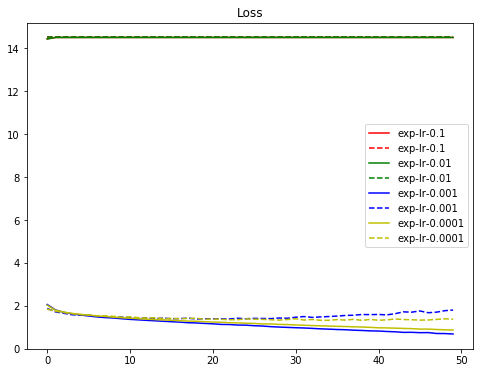

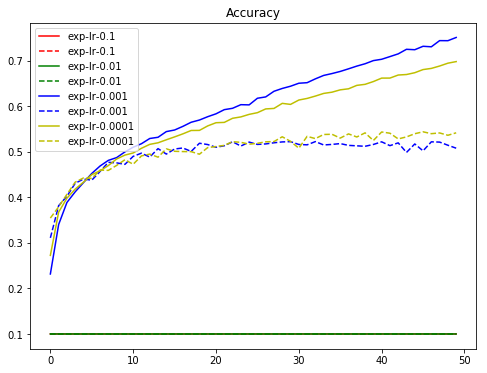

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results4.keys()):
    plt.plot(range(len(results4[cond]['train-loss'])),results4[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results4[cond]['valid-loss'])),results4[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results4.keys()):
    plt.plot(range(len(results4[cond]['train-acc'])),results4[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results4[cond]['valid-acc'])),results4[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()